# Analyzing Stock Market Data to Build a Portfolio

## Project Goal

### Analyze share price data from various listings to answer the following questions:

1. What kind of Growth % do we expect from the various listings? <br>
2. How do the Growth % of the different listings correlate to each other? <br>
3. What is the estimated listing share price at a future date (prediction)? <br>
4. What kind of volatility do the listings have? <br>
5. How can we use our analysis to form a balanced investment portfolio? <br>

### Overall Methodology:

1. Import and organize data for the various listings <br>
2. Make observations about the data <br>
3. Use these observations to answer the questions <br>

## References

Share price information obtained from: [Yahoo Finance](https://finance.yahoo.com/) <br>
Link to Blogpost: [An Investing Newbie's Tryst with Data Science](https://medium.com/@kgraghav/an-investing-newbies-tryst-with-data-science-241737102a6a) <br>

## Inputs

### Below are the inputs to perform the analysis

In [1]:
s_list='AAPL FB NVDA TSLA FCAU F AAL UAL INO MVIS'  # List of stocks to be analyzed
total_investment=10000  # Total investment value in USD
sample_interval ='1d'  # Time interval to fetch data at
start='2019-09-10'  # Start date of interest 'mm/dd/yyyy' 
end='2020-09-09'  # End period of interest 'mm/dd/yyyy' 
resample_interval='3d'  # Upsampling/Downsampling interval (determined through trial and error)
datetime_query=['09/21/2020','10/21/2021'] # Datetime query values as 'mm/dd/yyyy' (for prediction)
pricetype='Open' # 'Open', 'Close', 'Low', 'High'

<b>For this analysis, we look at the following listings (from different industries): </b> <br>
<table style="width:100%">
  <tr><tr align="Center">
    <th>Listed Name</th>
    <th>Company Name</th>
    <th>Industry</th>
  </tr>
  <tr>
    <tr align="Center">
    <td>AAPL</td>
    <td>Apple</td>
    <td>Technology</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>FB</td>
    <td>Facebook</td>
    <td>Technology</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>NVDA</td>
    <td>NVDIA</td>
    <td>Technology</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>TSLA</td>
    <td>Tesla</td>
    <td>Auto (Electric)</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>FCAU</td>
    <td>FCA</td>
    <td>Auto</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>F</td>
    <td>Ford</td>
    <td>Auto</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>AAL</td>
    <td>American Airlines</td>
    <td>Airline</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>UAL</td>
    <td>United Airlines</td>
    <td>Airline</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>INO</td>
    <td>Inovio</td>
    <td>Medical</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>MVIS</td>
    <td>Microvision</td>
    <td>Medical</td>
  </tr>
</table>

## Import Libraries

In [2]:
# Python Version
import sys
sys.version

'3.6.11 | packaged by conda-forge | (default, Jul 23 2020, 22:18:32) \n[GCC 7.5.0]'

In [3]:
#Update python standard libraries install
!pip install --upgrade pip

# library to for array handling
import numpy as np 

# library for dataframes
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Linear Model
import sklearn as sk

# Math Module
import math

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# Machine-Learning and analysis modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Module to handle XML and HTML 
! pip install lxml;

#Finance information import (Link in "Yahoo Finance" Markdown Cell in the "References" Section)
!pip install yfinance;
import yfinance as yf;

print('Libraries imported.')

     |████████████████████████████████| 1.5MB 7.3MB/s eta 0:00:01
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1
     |████████████████████████████████| 5.5 MB 6.7 MB/s eta 0:00:01     |█████▍                          | 921 kB 6.7 MB/s eta 0:00:01     |████████▏                       | 1.4 MB 6.7 MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=72cda2a0b9f1c05896c4f21dc850dad1c445338b6a30602db23e33f37cc33ef5
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/6f/ad/f4/4a269deab015672fd1ab353d6b2c3fcf64f413980737c13541
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=7a64fff0ae0e3f1a8f51a98bf28624600395a12762c91c3f99ddca3e1d8fc31d
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/5e/8a/c4/59c699498647c7c94b14c87a904ca7540646107b3d94b7c320
Successfully built yfinance multitasking
Libraries imported.


## Import Data into DataFrame

### Create basic dataframe "df_info" containing all the available stocks information

In [4]:
# Create list of stock names as specified by the User
s_list=s_list.split(' ')

In [5]:
# Initialize Basic Dataframe as empty
df_info=pd.DataFrame() 

# Add Shares information for List of stock names
for item in s_list:
    data=yf.Ticker(item)
    df_data=data.history(period=sample_interval,start=start ,end=end )
    df_data=df_data.reset_index()
    df_data['Name']=pd.DataFrame([item for i in range(0,len(df_data))])
    df_info=pd.concat([df_info,df_data])

# Display basic information
df_info.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
0,2019-09-10,52.94,53.66,52.41,53.64,127111600,0.0,0.0,AAPL
1,2019-09-11,53.98,55.38,53.90,55.35,177158400,0.0,0.0,AAPL
2,2019-09-12,55.65,56.05,55.17,55.22,128906800,0.0,0.0,AAPL
3,2019-09-13,54.46,54.66,53.72,54.15,159053200,0.0,0.0,AAPL
4,2019-09-16,53.90,54.49,53.86,54.43,84632400,0.0,0.0,AAPL


In [6]:
# Size of Data:
print('Size of the full dataset is: {} by {}'.format(df_info.shape[0],df_info.shape[1]))

Size of the full dataset is: 2520 by 9


## Exploratory Pre-Processing Analysis

### Create Dataframe (df) of Opening Price vs. date, which will be the data looked at in this analysis  

In [7]:
# Create new Dataframe of Opening Share Prices
df=pd.DataFrame();
for item in s_list:
    df[['Date',item]]=df_info.loc[df_info['Name']==item,['Date',pricetype]]
df=df.set_index('Date')
df_price=df
# Display initial few contents of the Dataset
df.tail(10)

,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
Date,,,,,,,,,,
2020-08-25,124.70,272.41,505.08,394.98,11.42,7.01,13.69,36.44,11.73,1.25
2020-08-26,126.18,284.00,511.82,412.00,11.31,6.94,13.11,35.26,12.59,1.32
2020-08-27,127.14,300.16,511.11,436.09,11.34,6.83,13.43,35.50,12.28,1.56
2020-08-28,126.01,295.00,506.85,459.02,11.15,6.93,13.59,37.14,11.80,1.63
2020-08-31,127.58,293.95,527.15,444.61,11.23,6.90,13.60,37.25,12.29,1.70
2020-09-01,132.76,294.71,539.20,502.14,10.82,6.77,12.86,35.25,11.60,1.56
2020-09-02,137.59,298.88,588.15,478.99,10.84,6.81,12.94,36.10,11.17,1.60
2020-09-03,126.91,295.99,553.15,407.23,11.21,6.92,13.40,37.13,10.26,1.54
2020-09-04,120.07,287.25,511.35,402.81,11.27,6.86,13.65,38.15,9.85,1.47


### Display basic information about this dataset

In [8]:
# Display basic statistics of the opening prices
# Darker cells denote higher values
df.describe().style.background_gradient(axis=1).format("{:.2f}")

,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
count,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00
mean,77.15,209.26,291.51,154.00,10.96,7.29,19.97,58.65,8.92,0.88
std,18.24,31.38,95.72,101.81,2.22,1.54,7.91,27.59,7.18,0.53
min,52.94,139.75,172.15,44.91,5.64,4.27,8.77,19.67,1.98,0.16
25%,64.24,188.06,212.00,70.82,9.63,6.05,12.40,32.78,2.61,0.61
50%,73.49,205.94,255.91,133.31,11.28,7.10,18.02,49.27,6.92,0.74
75%,82.96,230.00,362.45,185.52,12.54,8.81,28.02,88.32,13.49,1.10
max,137.59,300.16,588.15,502.14,14.83,9.39,31.20,94.00,31.64,3.00


<b> A few notes and observations: </b> </br>
1. All values in the "count" row are the same, implying there are no bad values (such as NaNs) <br>
2. NVDIA and TESLA have some of the highest price fluctuations in absolute value based on their std. <br>
3. The listings looked at in the tech. industry have some of the highest share prices, followed by the airline industry. The Auto industry is generally lower with the exception of Tesla, whose share price is on par with the tech. industry (what's different here?)<br>
4. NVDIA and TESLA have seen some of the highest rises in absolute prices over the period <br>
5. Inovio (medical industry) has the highest rise in percentage of initial price <br>

### Create basic Time plot to look at pertinent information (Opening price)

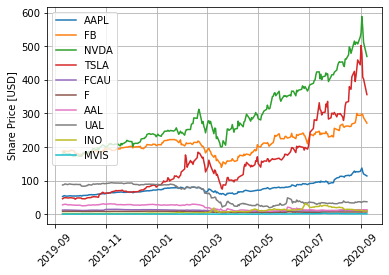

In [9]:
# Plot Open price vs. Time
ax= plt.subplot()
for item in df_price.columns:
    plt.plot(df_price[item])

ax.legend(df_price.columns)
plt.ylabel('Share Price [USD]')
plt.xticks(rotation=45)
ax.grid(True)

<b>Again a few things to note: </b><br>
1. Tech industry stocks seem to follow a similar trend w.r.t. time <br>
2. Tech industry stocks are seen to rise steadily. <br>
3. All listings had a decline around the 2020-03 to 2020-04 timeframe. <br>
4. Tech industry stocks rebounded back much better than the other industry listings after 2020-04. Tesla is the exception which more closely forllows the trends of the Tech. industry <br>

## What kind of Growth % do we see with the various listings?

### Normalize the opening price to determine Growth % over the period of interest

Normalize w.r.t. start price (df_start) <br> 
Normalization used: (price-start_price)/start_price*100 to obtain df_norm

In [10]:
# Normalization Function
def df_normalize(df):
    df_strt=df.iloc[0,:]
    df_norm=(df.iloc[:,:]-df_strt)/df_strt*100
    df_strt=pd.DataFrame(df_strt).transpose()
    df_strt=df_strt.set_axis(['start_price'])
    return [df_norm,df_strt]

# Store Normalized values in DataFrame and display results                          
[df_norm,df_start]=df_normalize(df)
df_norm.head()

,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
Date,,,,,,,,,,
2019-09-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-11,1.964488,-0.522834,2.561378,2.859619,-0.554236,2.391800,3.133903,0.481651,10.407240,-3.225806
2019-09-12,5.119003,1.291080,3.914770,7.322357,-0.554236,3.075171,4.950142,1.697248,18.099548,4.838710
2019-09-13,2.871175,-0.058685,1.342207,6.997400,1.346002,4.328018,6.801994,3.681193,17.647059,1.612903
2019-09-16,1.813374,-0.272087,-0.145406,6.585789,0.554236,3.075171,0.997151,1.261468,15.837104,4.838710


In [11]:
# Size of Data:
print('Size of the data is: {} by {}'.format(df_norm.shape[0],df_norm.shape[1]))

Size of the data is: 252 by 10


In [12]:
# Display basic statistics of the normalized prices
# Darker cells denote higher values
df_norm.describe().loc[['count','mean','min','max'],:].style.background_gradient(axis=1).format("{:.1f}")

,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
count,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0
mean,45.7,11.6,63.0,233.6,-13.2,-17.0,-28.9,-32.7,303.8,41.8
min,0.0,-25.4,-3.7,-2.7,-55.3,-51.4,-68.8,-77.4,-10.4,-74.2
max,159.9,60.1,228.9,987.8,17.4,6.9,11.1,7.8,1331.7,383.9


### Plot trends in Normalized values

Time Plot

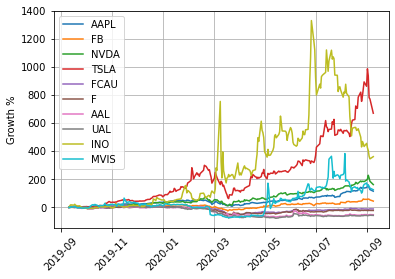

In [13]:
# Display Growth % over time
ax= plt.subplot()
for item in df_norm.columns:
    plt.plot(df_norm[item])

ax.legend(df.columns)
plt.ylabel('Growth %')
plt.xticks(rotation=45)
ax.grid(True)

## How do the price gains of the listings correlate to each other?

Correlation Matrix

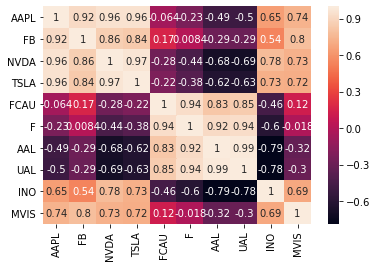

In [14]:
sns.heatmap(df_norm.corr(),annot=True);

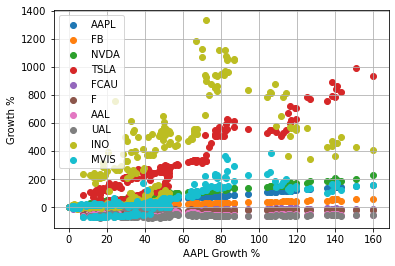

In [15]:
ax= plt.subplot()
for item in df_norm.columns:
    plt.scatter(df_norm.iloc[:,0],df_norm[item])

ax.legend(df_norm.columns)
plt.xlabel('{} Growth %'.format(df_norm.columns[0]))
plt.ylabel('Growth %')
ax.grid(True)

<b>Observations:</b> <br>
1. Best matches between various companies in the tech industry (and Tesla) <br>
2. Worst matches between the tech industry and airline industry <br>
3. Medical industry has intermediate match with the tech industry and bad match with the airline and auto industry<br>
4. Auto and airline industries correlate well with each other <br>

### Some general observations and next steps

1. Time Data is too transient to determine good (suitably longer term) trends of rise and fall of prices <br>
2. To alleviate this, the data is downsampled so that the transients are smoothed out and better estimates can be made for rise and fall trends

## General approach to answer the remaining questions:

1. Downsample the data to smoothen it and obtain longer term trends in rise and fall of prices <br>
2. Use the smoothened data to obtain price rise and price fall information <br>
3. Use the standard deviation of the price rise/fall values to determine the price bounds  <br>
4. Use the ratio of price bounds and the change in price, to estimate "volatility" <br>
5. Create a linear regression fit object for the historical data over the period of analysis <br>
6. Estimate the "reward" or slope of price change from the fit object <br>
7. Plot the historical data along with the linear fit and price bounds to see how well the historical data falls within these margins <br>
8. Estimate the "returns_ratio" as the ratio between the "reward" and "volatility" for each listing <br>
9. The amount to invest in each listing is the weighted average of the "returns_ratio" multiplied by the total investment capital <br>

### Downsample the data to filter out high frequency changes and determine pertinent trends

<b> Downsampled normalized data  "df_norm_resampled"</b>

In [16]:
# Downsample with cubic interpolation
df_norm_resampled=df_norm.resample(resample_interval).interpolate(method='cubic')
df_norm_resampled.head().style.format("{:.2f}")

,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
Date,,,,,,,,,,
2019-09-10 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2019-09-13 00:00:00,2.87,-0.06,1.34,7.00,1.35,4.33,6.80,3.68,17.65,1.61
2019-09-16 00:00:00,1.81,-0.27,-0.15,6.59,0.55,3.08,1.00,1.26,15.84,4.84
2019-09-19 00:00:00,3.82,0.65,0.58,6.59,-0.71,2.62,1.25,3.61,13.12,0.00
2019-09-22 00:00:00,3.38,-0.77,-1.10,1.33,-4.29,1.05,-1.17,2.75,7.85,-4.19


<b> Downsampled normalized data statistics "df_norm_resampled" </b>

In [17]:
# Basic downsampled statistics of normalized data
df_norm_resampled.describe().loc[['count','mean','min','max'],:].style.background_gradient(axis=1).format("{:.1f}")

,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
count,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0
mean,45.3,11.5,62.1,228.8,-13.0,-16.7,-28.3,-32.0,296.8,40.8
min,0.0,-20.2,-4.3,-2.7,-54.8,-51.4,-66.9,-74.2,-7.2,-72.6
max,150.8,57.2,201.5,987.8,17.4,5.8,11.7,7.6,1123.5,383.9


<b> Downsampled price data </b>

In [18]:
# Downsample with cubic interpolation
df_resampled=df.resample(resample_interval).interpolate(method='cubic')
df_resampled.head()

,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
Date,,,,,,,,,,
2019-09-10,52.940000,187.440000,178.810000,46.160000,12.630000,8.780000,28.080000,87.200000,2.210000,0.620000
2019-09-13,54.460000,187.330000,181.210000,49.390000,12.800000,9.160000,29.990000,90.410000,2.600000,0.630000
2019-09-16,53.900000,186.930000,178.550000,49.200000,12.700000,9.050000,28.360000,88.300000,2.560000,0.650000
2019-09-19,54.960000,188.660000,179.840000,49.200000,12.540000,9.010000,28.430000,90.350000,2.500000,0.620000
2019-09-22,54.729047,185.998723,176.844526,46.775952,12.088506,8.872199,27.751935,89.598975,2.383418,0.594005


<b> Downsampled price data statistics </b>

In [19]:
# Basic downsampled statistics of share price data
df_resampled.describe().loc[['count','mean','min','max'],:].style.background_gradient(axis=1).format("{:.1f}")

,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
count,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0
mean,76.9,209.0,289.9,151.8,11.0,7.3,20.1,59.3,8.8,0.9
min,52.9,149.7,171.2,44.9,5.7,4.3,9.3,22.5,2.0,0.2
max,132.8,294.7,539.2,502.1,14.8,9.3,31.4,93.8,27.0,3.0


<b>Time plot of filtered price data</b>

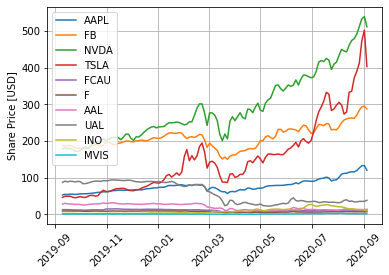

In [34]:
ax= plt.subplot()
for item in df_resampled.columns:
    plt.plot(df_resampled.index,df_resampled[item])

ax.legend(df_resampled.columns)
plt.ylabel('Share Price [USD]')
plt.xticks(rotation=45)
ax.grid(True)

We are able to sufficiently capture trends now after the filtering.<br>

### Calculate Time, percent and absolute rise and fall of Growth 

1. "df_norm_resampled_rise_fall" is the dataframe of the normalized rise and fall prices <br>
2. "df_norm_resampled_rise_fall_time" is the dataframe of the rise and fall times of the normalized changes <br>
3. "df_norm_resampled_rise_fall_prices" is the dataframe of the rise and fall prices, calculated from the normalized values and the start value <br>

In [21]:
def rise_fall_stat(df,item):
    """ 
    Function to calculate price rise and fall and rise and fall times
    
        Inputs: 
            df: Dataframe of prices
            item: list of stocks
            
        Outputs: 
            df_rise_fall: Dataframe of rise and fall statistics
            df_rise_fall_times: Dataframe of rise and fall times
             
     """
    #Initialize rise and fall arrays
    rise=np.array([])        
    fall=np.array([])
    rise_t=np.array([])        
    fall_t=np.array([])
    # if df[i]-df[i-1] is positive, 
    # add that to rise and add the time delta to rise_time
    # else if negative, add that (absolute) to fall, and add the time delta to fall_time
    # else move to next point
    i=1
    while i<len(df)-1:
        rise_val=0
        fall_val=0
        rise_time=0
        fall_time=0
        try:
            while df.iloc[i]>df.iloc[i-1] and i<len(df)-1:
                rise_val=rise_val+(df.iloc[i]-df.iloc[i-1])
                rise_time=rise_time+((df.index[i]-df.index[i-1]).value)
                i=i+1
            rise=np.append(rise,rise_val)
            rise_t=np.append(rise_t,rise_time)
        except:
            print('{} error at: {}, {}'.format(e,item,i))
        try:
            while df.iloc[i]<df.iloc[i-1] and i<len(df)-1:
                fall_val=fall_val+(df.iloc[i-1]-df.iloc[i])
                fall_time=fall_time+((df.index[i]-df.index[i-1]).value)
                i=i+1
            fall=np.append(fall,fall_val)
            fall_t=np.append(fall_t,fall_time)
        except:
            print('{} error at: {}, {}'.format(e,item,i))
        i=i+1
    # Estimate statistics for rise and fall arrays and create a dataframe for it
    df_rise_fall=pd.DataFrame({'%_rise_mean': [np.mean(rise)],'%_fall_mean': [np.mean(fall)],
                               '%_rise_min': [np.min(rise)],'%_fall_min': [np.min(fall)],
                               '%_rise_max': [np.max(rise)],'%_fall_max': [np.max(fall)],
                               '%_rise_std': [np.std(rise)],'%_fall_std': [np.std(fall)]}).transpose()
    df_rise_fall=df_rise_fall.rename(columns={0:item})
    # Estimate statistics for rise and fall arrays and create a dataframe for it
    df_rise_fall_time=pd.DataFrame({'time_rise_mean': pd.to_timedelta([np.mean(rise_t)]).days,
                                    'time_fall_mean': pd.to_timedelta([np.mean(fall_t)]).days,
                               'time_rise_min': pd.to_timedelta([np.min(rise_t)]).days,
                                    'time_fall_min': pd.to_timedelta([np.min(fall_t)]).days,
                               'time_rise_max': pd.to_timedelta([np.max(rise_t)]).days,
                                    'time_fall_max': pd.to_timedelta([np.max(fall_t)]).days,
                               'time_rise_std': pd.to_timedelta([np.std(rise_t)]).days,
                                    'time_fall_std': pd.to_timedelta([np.std(fall_t)]).days}).transpose()
    df_rise_fall_time=df_rise_fall_time.rename(columns={0:item})
    # Return rise, fall dataframes for price and time
    return [df_rise_fall,df_rise_fall_time]

In [22]:
# Calculate rise and fall in Growth % (w.r.t. initial price) for each listing using rise_fall_stat(...)
df_norm_resampled_rise_fall=pd.DataFrame()
df_norm_resampled_rise_fall_time=pd.DataFrame()
# for each listing, obtain the rise and fall prices and times:
for name in df_norm_resampled.columns:
    df_norm_resampled_rise_fall=pd.concat([df_norm_resampled_rise_fall,rise_fall_stat(df_norm_resampled[name],name)[0]],axis=1)
    df_norm_resampled_rise_fall_time=pd.concat([df_norm_resampled_rise_fall_time,rise_fall_stat(df_norm_resampled[name],name)[1]],axis=1)

In [23]:
# Display values for each listing. Darker cells denote larger values
df_norm_resampled_rise_fall.style.background_gradient(axis=1).format("{:.1f}")

,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
%_rise_mean,8.9,4.4,8.3,58.0,4.3,3.5,5.3,3.1,84.8,20.1
%_fall_mean,6.5,4.6,7.7,40.2,6.5,6.0,8.6,6.6,89.1,23.7
%_rise_min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%_fall_min,0.1,0.1,0.1,0.4,0.6,0.6,0.4,0.0,2.6,0.0
%_rise_max,42.5,13.1,43.7,483.0,21.3,14.0,24.5,16.3,652.9,146.0
%_fall_max,31.7,23.1,42.5,215.2,52.6,32.3,49.1,66.5,525.9,245.2
%_rise_std,10.2,4.4,10.3,106.9,5.8,4.0,6.5,4.3,150.6,34.1
%_fall_std,9.8,5.7,9.7,54.4,10.8,6.6,9.9,12.7,126.1,45.7


In [24]:
# Display values for each listing. Darker cells denote larger values
df_norm_resampled_rise_fall_time.style.background_gradient(axis=1)

,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
time_rise_mean,8,5,5,6,4,4,4,3,7,3
time_fall_mean,4,6,5,5,9,7,6,7,8,6
time_rise_min,0,0,0,0,0,0,0,0,0,0
time_fall_min,3,3,3,3,3,3,3,0,3,0
time_rise_max,30,15,18,24,24,21,21,12,21,12
time_fall_max,18,15,15,18,36,21,24,27,27,12
time_rise_std,8,5,4,6,5,6,4,3,6,3
time_fall_std,3,3,3,3,8,4,4,5,6,3


Convert rise and fall from % to price (using price change= percent change/100*start price) and display.<br>

In [25]:
print('df_start={}'.format(df_start))
df_norm_resampled_rise_fall_prices=pd.DataFrame(df_norm_resampled_rise_fall.values/100*df_start.values)
# set appropriate index axis:
df_norm_resampled_rise_fall_prices=df_norm_resampled_rise_fall_prices.set_axis(
    [index.replace('%','price') for index in df_norm_resampled_rise_fall.index],
                                                 axis=0).set_axis(df_norm_resampled_rise_fall.columns,axis=1)
df_norm_resampled_rise_fall_prices.style.background_gradient(axis=1).format("{:.1f}")

df_start=              AAPL      FB    NVDA   TSLA   FCAU     F    AAL   UAL   INO  \
start_price  52.94  187.44  178.81  46.16  12.63  8.78  28.08  87.2  2.21   

             MVIS  
start_price  0.62  


,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
price_rise_mean,4.7,8.2,14.8,26.8,0.5,0.3,1.5,2.7,1.9,0.1
price_fall_mean,3.5,8.5,13.7,18.6,0.8,0.5,2.4,5.7,2.0,0.1
price_rise_min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price_fall_min,0.0,0.1,0.1,0.2,0.1,0.1,0.1,0.0,0.1,0.0
price_rise_max,22.5,24.5,78.1,222.9,2.7,1.2,6.9,14.3,14.4,0.9
price_fall_max,16.8,43.3,75.9,99.3,6.6,2.8,13.8,58.0,11.6,1.5
price_rise_std,5.4,8.3,18.4,49.4,0.7,0.4,1.8,3.7,3.3,0.2
price_fall_std,5.2,10.7,17.3,25.1,1.4,0.6,2.8,11.0,2.8,0.3


### Create a linear regression fit for the data with 3 std. of the maximum of rise and fall to determine the boundaries

<b> Linear Regression object, score and price boundaries for each listing </b>

In [26]:
def lin_obj(df):
    """ 
    Function to create an array of linear fit objects between price and time
    
        Inputs: 
            df: Dataframe of prices
            
        Outputs: 
            df_lin: Linear fit object dataframe
             
     """
    df_lin=df.iloc[0:1,:]
    df_lin=df_lin.reindex(['fit_obj','score','price_bounds'])
    for item in df_lin.columns:
        price_bound=np.maximum(df_norm_resampled_rise_fall_prices.loc['price_rise_std',item],
                                  df_norm_resampled_rise_fall_prices.loc['price_fall_std',item])*3
        df_lin.loc['price_bounds',item]=price_bound
        
        # Implement train-test split thrice and fit the data to the average fit ...
        # ... (intercept and coeff.) of the three splits
        X=np.array(pd.to_numeric(df.index)).reshape(-1, 1)
        Y=(df[item].values).reshape(-1, 1)
        lin_list_coeff=[]
        lin_list_intercept=[]
        for i in range(0,2):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
            lin_obj=LinearRegression()
            lin_obj.fit(X_train,y_train)
            lin_list_coeff.append(lin_obj.coef_)
            lin_list_intercept.append(lin_obj.intercept_)
        linobj = LinearRegression()
        linobj.coef_=np.array(np.array(lin_list_coeff).mean()).reshape(-1)
        linobj.intercept_=np.array(np.array(lin_list_intercept).mean()).reshape(-1)
        score=linobj.score(X,Y)
        df_lin.loc['fit_obj',item]=linobj
        df_lin.loc['score',item]=score
        df_lin=df_lin.rename_axis(index='')
        
    return df_lin

In [27]:
# Call lin_obj(...) to create the linear regression object dataframe
df_price_est_obj=lin_obj(df)
df_price_est_obj

,AAPL,FB,NVDA,TSLA,FCAU,F,AAL,UAL,INO,MVIS
,,,,,,,,,,
fit_obj,"LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr..."
score,0.701982,0.449336,0.864959,0.785741,0.286742,0.465466,0.719164,0.756229,0.71051,0.338989
price_bounds,16.142,32.1444,55.2867,148.053,4.10985,1.73986,8.36513,33.1044,9.98723,0.850486


### Estimate the price and bounds vs. date using the fit object

In [28]:
# Function to estimate the price given the price dataframe, fit objects and datetime query
def price_est(df,df_price_est_obj,datetime_query):
    """ 
    Function to estimate the price and bounds using the linear fit of price vs. time
    
        Inputs: 
            df: Dataframe of prices
            df_price_est_obj: Price estimation fit object dataframe
            datetime_query: Datetime query to calculate the estimate at
            
        Outputs: 
            df_price_est: Dataframe of estimated prices (high, low, mean, high-mid and low-mid)
             
     """
    df_price_est=pd.DataFrame()
    df_price_est=df_price_est.rename_axis(index='Datetime')
    df_price_est['Datetime']=pd.to_datetime(datetime_query)
    df_price_est=df_price_est.set_index('Datetime')
    for item in df.columns:
        fit_obj=df_price_est_obj.loc['fit_obj',item]
        for datetime in df_price_est.index:
            price_est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            df_price_est.loc[datetime,'{}'.format(item)]=price_est
            df_price_est.loc[datetime,'{}_low'.format(item)]=price_est-(df_price_est_obj.loc['price_bounds',item])
            df_price_est.loc[datetime,'{}_high'.format(item)]=price_est+(df_price_est_obj.loc['price_bounds',item])
            df_price_est.loc[datetime,'{}_lo_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_low'.format(item)]].mean()
            df_price_est.loc[datetime,'{}_hi_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_high'.format(item)]].mean()
    df_price_est=df_price_est.reindex(df_price_est.index.date)
    df_price_est=df_price_est
    return df_price_est


## What is the predicted share price?

In [29]:
df_price_est=price_est(df,df_price_est_obj,datetime_query)
df_price_est.head().style.background_gradient(axis=1).format("{:.0f}")

,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,FCAU,FCAU_low,FCAU_high,FCAU_lo_mid,FCAU_hi_mid,F,F_low,F_high,F_lo_mid,F_hi_mid,AAL,AAL_low,AAL_high,AAL_lo_mid,AAL_hi_mid,UAL,UAL_low,UAL_high,UAL_lo_mid,UAL_hi_mid,INO,INO_low,INO_high,INO_lo_mid,INO_hi_mid,MVIS,MVIS_low,MVIS_high,MVIS_lo_mid,MVIS_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-21,105,89,121,97,113,248,216,281,232,265,457,402,512,430,485,317,169,465,243,391,9,5,13,7,11,5,4,7,4,6,8,-0,16,4,12,15,-18,48,-2,31,20,10,30,15,25,1,1,2,1,2
2021-10-21,161,145,178,153,169,328,296,360,312,344,793,738,849,766,821,648,500,796,574,722,4,0,9,2,7,1,-0,3,1,2,-17,-25,-8,-21,-13,-74,-108,-41,-91,-58,43,33,53,38,48,3,2,3,2,3


## What kind of volatility do the listings have?

## How do we generate our investment portfolio?

### Estimate the price history along with the bounds and plot the history and estimates for each listing

In [30]:
# Datetime history query values
datetime_query_start_end=pd.date_range(start=start,end=end)

In [31]:
# Generate and display estimates (listing, listing_low, listing_high)
df_price_est_start_end=price_est(df,df_price_est_obj,datetime_query_start_end)
df_price_est_start_end.head().style.format("{:.0f}")

,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,FCAU,FCAU_low,FCAU_high,FCAU_lo_mid,FCAU_hi_mid,F,F_low,F_high,F_lo_mid,F_hi_mid,AAL,AAL_low,AAL_high,AAL_lo_mid,AAL_hi_mid,UAL,UAL_low,UAL_high,UAL_lo_mid,UAL_hi_mid,INO,INO_low,INO_high,INO_lo_mid,INO_hi_mid,MVIS,MVIS_low,MVIS_high,MVIS_lo_mid,MVIS_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-10,51,35,67,43,59,173,141,205,157,189,136,81,191,109,164,1,-147,149,-73,75,13,9,17,11,15,9,7,11,8,10,32,23,40,27,36,100,67,133,83,116,-2,-12,8,-7,3,0,-0,1,-0,1
2019-09-11,51,35,67,43,59,173,141,205,157,189,137,82,192,109,165,2,-146,150,-72,76,13,9,17,11,15,9,7,11,8,10,32,23,40,27,36,99,66,133,83,116,-2,-12,8,-7,3,0,-0,1,-0,1
2019-09-12,51,35,68,43,60,173,141,205,157,189,138,83,193,110,166,3,-145,151,-71,77,13,9,17,11,15,9,7,11,8,10,31,23,40,27,36,99,66,132,83,116,-1,-11,9,-6,4,0,-0,1,-0,1
2019-09-13,52,35,68,44,60,173,141,205,157,189,139,83,194,111,166,4,-144,152,-70,78,13,9,17,11,15,9,7,11,8,10,31,23,40,27,36,99,66,132,82,116,-1,-11,9,-6,4,0,-0,1,-0,1
2019-09-14,52,36,68,44,60,174,141,206,157,190,140,84,195,112,167,5,-144,153,-69,79,13,9,17,11,15,9,7,11,8,10,31,23,40,27,36,99,66,132,82,115,-1,-11,9,-6,4,0,-0,1,-0,1


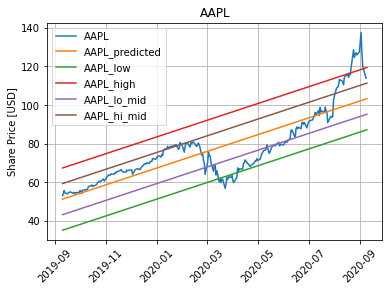

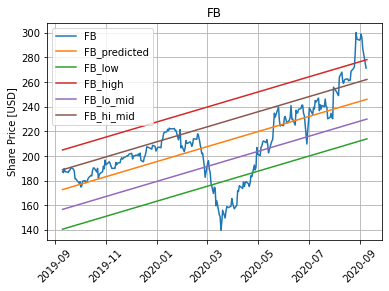

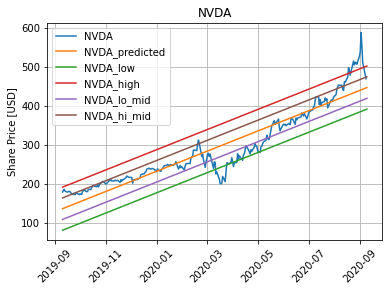

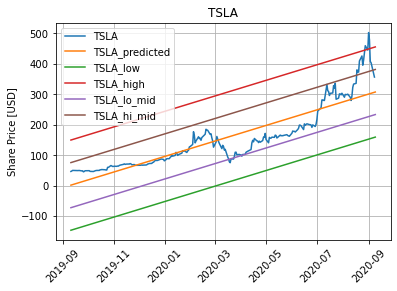

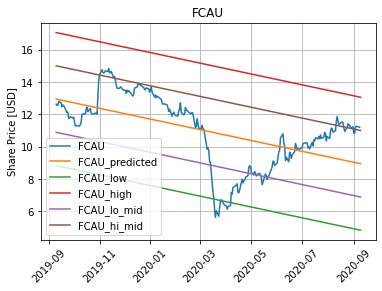

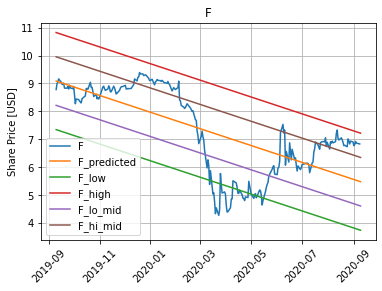

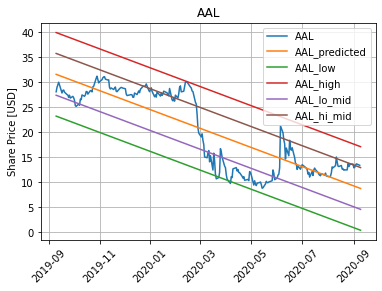

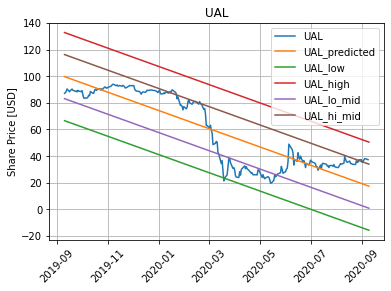

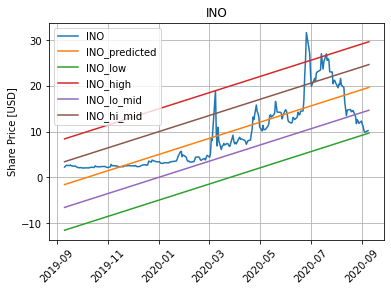

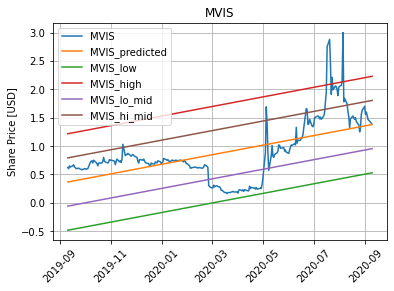

In [32]:
# Plot Open price vs. Time
num_plot=len(df.columns)
i=1
for item in df.columns:
    plt.figure()
    plt.plot(df[item])
    plt.plot(df_price_est_start_end[[item,item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid']])
    plt.legend([item,item+'_predicted',item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid'])
    plt.ylabel('Share Price [USD]')
    plt.xticks(rotation=45)
    plt.grid(True)
    #plt.ylim(0,700)
    plt.title(item)
    i=i+1

## Constructing the Portfolio

In order to balance the investments, we'd want to have the most benefit (reward) while minimizing volatility (risk).<br>
1. We can consider 'reward' to be the slope of the linear fit to share price (higher the slope, higher the gain).<br>
2. We can consider 'risk' to be the ratio between the price bounds and change in price over the duration of interest <br>
3. Hence we can compute a 'returns ratio' = 'reward'/'risk' for each listing; the higher this value, the more this investment is viable. <br>
4. Then we can compute the sum of the returns ratios for each listing and divide the returns ratio by the summed value, to determine the "weight" of each investment <br>
5. Finally we can multiply the "weight" by the total investment capital (total_investment) to obtain the recommended investment for each listing <br>    

### Use the Linear Regression object to construct the reward, volatility, returns ratio, weight and suggested investment values

In [33]:
# Initialize the portfolio dataframe df_portfolio and update the index suitably
df_portfolio=df_price_est_obj
df_portfolio=df_portfolio.reindex(['reward','risk','returns_ratio','weight','suggested_investment'])
df_portfolio=df_portfolio.rename_axis(index='Parameters')

# Update "reward" using the slope of the line fit (multiplied by a suitable factor for display)
for item in (df_portfolio.columns):
    df_portfolio.loc['reward',item]=(df_price_est_obj.loc['fit_obj',item].coef_[0])*10**17
    
# Update the "volatility" as the ratio of the price bounds to the absolute net price change over the duration
for item in (df_portfolio.columns):
    df_portfolio.loc['risk',item]=(df_price_est_obj.loc['price_bounds',
                                                              item])/abs(df_price_est_start_end.loc[df_price_est_start_end.index[-1],
                                                                                                 item]-
                                         df_price_est_start_end.loc[df_price_est_start_end.index[0],
                                                                    item])
                                         
# Update the returns ratio as the ratio between the "reward" and "volatility"
for item in (df_portfolio.columns):
    df_portfolio.loc['returns_ratio',item]=(df_portfolio.loc['reward',item]/
                                            df_portfolio.loc['risk',item])
    
# Remove those listings with negative returns_ratio since those imply a falling stock
for item in df_portfolio.columns:
    if df_portfolio.loc['reward',item]<=0:
        df_portfolio.pop(item)
        
# Obtain the weighted average of the returns ratio for each listing
for item in (df_portfolio.columns):
    df_portfolio.loc['weight',item]=df_portfolio.loc['returns_ratio',item]/df_portfolio.loc['returns_ratio',:].sum()

# Multiply the weight of each listing by the total investment capital to obtain the recommended investment
for item in (df_portfolio.columns):
    df_portfolio.loc['suggested_investment',item]=df_portfolio.loc['weight',item]*total_investment

# Display the portfolio dataframe
df_portfolio.style.background_gradient(axis=1).format("{:.2f}")

,AAPL,FB,NVDA,TSLA,INO,MVIS
Parameters,,,,,,
reward,165.22,232.41,985.48,969.53,67.34,3.21
risk,0.31,0.44,0.18,0.48,0.47,0.84
returns_ratio,533.33,529.91,5539.62,2002.21,143.21,3.83
weight,0.06,0.06,0.63,0.23,0.02,0.00
suggested_investment,609.37,605.46,6329.47,2287.69,163.63,4.37


### What kind of volatility do the listings have?

 Refer the "volatility" row, higher the value, greater the volatility

### How do we use the data to construct our portfolio?

Refer the dataframe "df_portfolio"